# Extended Graham scan algorithm

Use the cell below for all python code needed to realise the extended Graham scan algorithm (including any auxiliary data structures and functions you might need). The `extendedgrahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [5]:
from matplotlib import pyplot as plt
from math import atan2

def get_region(points):
    min_y = 0
    min_x = 0
    max_y = 0
    max_x = 0

    n = len(points)
    for i in range(0, n):
        if points[i][1] < points[min_y][1]:
            min_y = i
        if points[i][0] < points[min_x][0]:
            min_x = i
        if points[i][1] > points[max_y][1]:
            max_y = i
        if points[i][0] > points[max_x][0]:
            max_x = i

    a = points[max_y]  # top
    b = points[min_x]  # left
    c = points[min_y]  # bottom
    d = points[max_x]  # right

    #print(a, b, c, d)

    region_1 = [a, b, d]
    region_2 = [b, c, d]

    for p in points:
        if p[0] < a[0] and p[1] > b[1] and det2(b, a, p) >= 0 or p[0] > a[0] and p[1] > d[1] and det2(a, d, p) >= 0:
            region_1.append(p)
        if p[0] < c[0] and p[1] < b[1] and det2(b, c, p) <= 0 or p[0] > c[0] and p[1] < d[1] and det2(c, d, p) <= 0:
            region_2.append(p)


    #print("region1 and 2",[region_1, region_2])

    region_1_sorted = sorted(region_1, key=lambda x: x[0])      #in upper region, sorted by ascending order of x
    region_2_sorted = sorted(region_2, key=lambda x: -x[0])     #in lower region, sorted by descending order of x

    return ([region_1_sorted, region_2_sorted])

import matplotlib.pyplot as plt

def det2(p1,p2,p3):
   return (p2[0] - p1[0]) * (p3[1] - p1[1]) \
          - (p2[1] - p1[1]) * (p3[0] - p1[0])


def det(p1, p2, p3):
    S = ((p2[1] - p1[1]) * (p3[0] - p2[0])) + ((p1[0] - p2[0]) * (p3[1] - p2[1]))
    return S


def extendedgrahamscan(inputSet):
    sorted_points = get_region(inputSet)

    #scatter_plot(inputSet, sorted_points)
    outputSet_1 = []
    outputSet_1.append(sorted_points[0][0])
    outputSet_1.append(sorted_points[0][1])
    for point in sorted_points[0][2:]:
        while det(outputSet_1[-2], outputSet_1[-1], point) < 0:
            if len(outputSet_1) >2:
               outputSet_1.pop()
        outputSet_1.append(point)

    outputSet_2 = []
    outputSet_2.append(sorted_points[1][0])
    outputSet_2.append(sorted_points[1][1])
    for point in sorted_points[1][2:]:
        while det(outputSet_2[-2], outputSet_2[-1],point) < 0:
            if len(outputSet_2) > 2:
               outputSet_2.pop()
        outputSet_2.append(point)

    hull = outputSet_1 + outputSet_2
    #list(set(outputSet_1 + outputSet_2))
    return hull

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [6]:
from random import randint

#code for random data generation
def create_points(ct,min=0,max=10000):
   return [[randint(min,max),randint(min,max)] \
         for _ in range(ct)]



#code for worst case data generation



Use the cell below for all python code needed to test the `extendedgrahamscan()` function on the data generated above.

In [7]:
import timeit

# for N in [100,500, 1000, 5000, 10000, 15000,20000]:



*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

[4458, 9994] [1, 7693] [2863, 7] [9993, 6491]


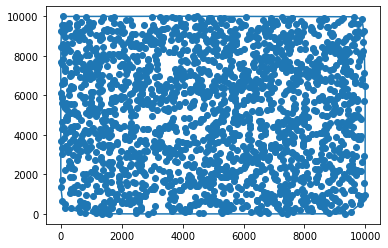

In [8]:

#inputSet = [[1.5,2], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1.5, 4.5], [2, 4], [3, 5], [3.5,1.5],[3.5,5], [5,3], [1.4,6], [3,2]]
#print("sorted list",get_region(inputSet))
inputSet = create_points(2000)
outputSet = extendedgrahamscan(inputSet)


plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet)
plt.plot(output_xs, output_ys)

plt.show()

